# Sortify

The goal is to automatically pre-sort the playlists I regularly create for the Rock 4 Temps club parties I'm part of.

Main objectives:
* Play first the most known musics
* Alternate slow and fast music

Secondary objectives:
* Display a histogram of bpm, ideally the majority should be close to 120 (for this type of dance)
* Display the "Title - Artist" list to easily generate the PDF for the evening.

## Get tracks

In [418]:
import os

import spotipy
from spotipy.oauth2 import SpotifyOAuth

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

In [419]:
c_id = os.environ['c_id']
c_secret = os.environ['c_secret']

sp = spotipy.Spotify(auth_manager=SpotifyOAuth(client_id=c_id,
                                               client_secret=c_secret,
                                               redirect_uri="https://127.0.0.1",
                                               scope="""
                                               playlist-read-private playlist-modify-private playlist-modify-public 
                                               playlist-read-collaborative user-library-modify"""))

In [420]:
results = sp.current_user_playlists(limit=50)

In [421]:
# Find playlist_id

playlist_id = "4FNN7270AruT0qJqpOq4dw"

if not playlist_id:
    for playlist in results['items']:
        print(playlist['name'], playlist['id'])

In [422]:
playlist_tracks = sp.user_playlist_tracks(playlist_id=playlist_id)

In [423]:
print(playlist_tracks['items'][0].keys())
print(playlist_tracks['items'][0]['track'].keys())
print(playlist_tracks['items'][0]['track']['album'].keys())

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])
dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])
dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])


In [424]:
def playlist_tracks_to_df(playlist_tracks):
    tracks = []
    for track in playlist_tracks['items']:
        t = track['track']
        features = sp.audio_analysis(t['id'])
        track = {
            'id': t['id'],
            'name': t['name'],
            'artist': ', '.join([artist['name'] for artist in t['artists']]),
            'duration_ms': t['duration_ms'],
            'explicit': t['explicit'],
            'release_date': t['album']['release_date'],
            'popularity': t['popularity'],
        }

        tracks.append(track)
    df = pd.DataFrame(tracks)
    return df

df = playlist_tracks_to_df(playlist_tracks)
df

,id,name,artist,duration_ms,explicit,release_date,popularity
0,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93
1,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86
2,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92
3,77loZpT5Y5PRP1S451P9Yz,The Reason,Hoobastank,232800,False,2003-12-09,81
4,4kbj5MwxO1bq9wjT5g9HaA,Shut Up and Dance,WALK THE MOON,199080,False,2014-12-02,84
5,4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77
6,1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83
7,2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75
8,5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,The Fray,262533,False,2005-09-13,82
9,4WpmwEdc4RBos8W8icSSxW,Moonlight Shadow,Mike Oldfield,218186,False,2009-01-01,71


## Get audio features

In [425]:
features = pd.DataFrame(sp.audio_features(tracks=df['id']))
for col in ['energy', 'mode', 'tempo']:
    df[col] = features[col]
df

,id,name,artist,duration_ms,explicit,release_date,popularity,energy,mode,tempo
0,0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93,0.846,0,87.981
1,7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86,0.524,1,95.010
2,5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92,0.764,1,169.928
3,77loZpT5Y5PRP1S451P9Yz,The Reason,Hoobastank,232800,False,2003-12-09,81,0.671,1,82.952
4,4kbj5MwxO1bq9wjT5g9HaA,Shut Up and Dance,WALK THE MOON,199080,False,2014-12-02,84,0.866,1,128.038
5,4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77,0.689,0,170.087
6,1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83,0.904,1,82.014
7,2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75,0.706,0,106.520
8,5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,The Fray,262533,False,2005-09-13,82,0.743,1,122.035
9,4WpmwEdc4RBos8W8icSSxW,Moonlight Shadow,Mike Oldfield,218186,False,2009-01-01,71,0.720,1,128.594


## Sort / Reindex

In [426]:
median_energy = np.median(df['energy'])

print(median_energy)

df = df.sort_values('popularity', ascending=False).reset_index(drop=True)

df_inf_median = df[df["energy"] < median_energy]
df_sup_median = df[df["energy"] >= median_energy]

print(df_inf_median.shape)
print(df_sup_median.shape)

0.736
(18, 10)
(19, 10)


In [427]:
ids_ordered = []

for id1, id2 in zip(df_sup_median['id'].values, df_inf_median['id'].values):
    ids_ordered.append(id1)
    ids_ordered.append(id2)

if df_inf_median.shape[0] > df_sup_median.shape[0]:
    ids_ordered.append(df_inf_median['id'].iloc[-1])
elif df_inf_median.shape[0] < df_sup_median.shape[0]:
    ids_ordered.append(df_sup_median['id'].iloc[-1])
    
print(ids_ordered)

['0e8nrvls4Qqv5Rfa2UhqmO', '7BKLCZ1jbUBVqRi2FVlTVw', '5PjdY0CKGZdEuoNab3yDmX', '77loZpT5Y5PRP1S451P9Yz', '4kbj5MwxO1bq9wjT5g9HaA', '4n7jnSxVLd8QioibtTDBDq', '1rqqCSm0Qe4I9rUvWncaom', '2sX7lJXsOYGP1Us6CqM9t1', '5fVZC9GiM4e8vu99W0Xf6J', '2Ms33RTRCT6gArrpcrPxmo', '4keoy2fqgwGnbWlm3ZVZFa', '4WpmwEdc4RBos8W8icSSxW', '7weX6syqklVQocpVVmDNwI', '0Uon5NsSAkBDx69XYOaQ5P', '1fr92Vupmcs2vgLMFVQ7rd', '3n2P3ipLt5mPFVaM0fJHNR', '7xg41ENLdW3nyy2p5C28ZW', '2SPEg45ZaUFJCg9GwNmRvw', '4DX82Vc8qAH4jJPvKxvwg6', '4U7G8dgUodMEVSv96QRcDb', '3wuR0YSNdT9rgWfFi1lctv', '5iDaEbPX8Lq2evx3ZpAgQU', '2LYAG9jlH9rul11nalRxR0', '0LuVpXVTaWY9Un2w9GkXjf', '64UmuvjJk7CxLZB6pKTrsS', '4O5BcYOGpbutyUhwExTSYu', '3zJeRYExRbqUbuynS6X8ZO', '5XGjHvW9kqp8QqFpMHmESt', '2yRnhiS36wm3MEkb1Vv3sQ', '5EhXpH8kkPEay1UyjBPgzb', '4P9J3tJZr0WE404GFOraLt', '3B3LaCPJ0PJZzXhGh1Nkzv', '2vu1gO7FXJ35Vz71Ra4hnz', '3s8Zq2jGW1rIDKYme02J85', '4F1wRJpj3i83yf7FBTo1W7', '6GjtNNrLuISyM6xyKWQOKq', '4FW23Ey3UoiMgbkdaWNjGX']


## Replace in Playlist

In [428]:
sp.playlist_replace_items(playlist_id, ids_ordered)

{'snapshot_id': 'NDksNjliMzJhMGZmYTdhNzE3MmEwMzZjYTdmNGNlYzQ0NzU2MjkwMzA3OQ=='}

## See result & Generate PDF

In [429]:
result = df.set_index("id")
result = result.reindex(ids_ordered)
result

,name,artist,duration_ms,explicit,release_date,popularity,energy,mode,tempo
id,,,,,,,,,
0e8nrvls4Qqv5Rfa2UhqmO,THATS WHAT I WANT,Lil Nas X,143901,True,2021-09-17,93,0.846,0,87.981
7BKLCZ1jbUBVqRi2FVlTVw,Closer,"The Chainsmokers, Halsey",244960,False,2016-07-29,86,0.524,1,95.010
5PjdY0CKGZdEuoNab3yDmX,STAY (with Justin Bieber),"The Kid LAROI, Justin Bieber",141805,True,2021-07-23,92,0.764,1,169.928
77loZpT5Y5PRP1S451P9Yz,The Reason,Hoobastank,232800,False,2003-12-09,81,0.671,1,82.952
4kbj5MwxO1bq9wjT5g9HaA,Shut Up and Dance,WALK THE MOON,199080,False,2014-12-02,84,0.866,1,128.038
4n7jnSxVLd8QioibtTDBDq,On My Way,"Alan Walker, Sabrina Carpenter, Farruko",193797,True,2019-03-21,77,0.689,0,170.087
1rqqCSm0Qe4I9rUvWncaom,High Hopes,Panic! At The Disco,190946,False,2018-06-22,83,0.904,1,82.014
2sX7lJXsOYGP1Us6CqM9t1,Little Bit of Love,Tom Grennan,226268,False,2021-01-08,75,0.706,0,106.520
5fVZC9GiM4e8vu99W0Xf6J,How to Save a Life,The Fray,262533,False,2005-09-13,82,0.743,1,122.035


In [430]:
# For easy copy pasting :)

def display(values):
    print(values[0], "-", values[1])

_ = result[['name', 'artist']].apply(display, axis=1)

THATS WHAT I WANT - Lil Nas X
Closer - The Chainsmokers, Halsey
STAY (with Justin Bieber) - The Kid LAROI, Justin Bieber
The Reason - Hoobastank
Shut Up and Dance - WALK THE MOON
On My Way - Alan Walker, Sabrina Carpenter, Farruko
High Hopes - Panic! At The Disco
Little Bit of Love - Tom Grennan
How to Save a Life - The Fray
Feel - Robbie Williams
Happy Now - Zedd, Elley Duhé
Moonlight Shadow - Mike Oldfield
Love Back - Why Don't We
Stay - Gracie Abrams
In the Shadows - The Rasmus
Wrap Me In Plastic - Marcus Layton Radio Edit - CHROMANCE, Marcus Layton
Fuck Up The Friendship - Leah Kate
None Of My Business - Cher Lloyd
Move Your Feet - Junior Senior
No Friends - Cadmium, Rosendale
Million Ways - HRVY
A Little Messed Up - june
Killer - The Ready Set
Mad World - Michael Andrews, Gary Jules
Addict - Silva Hound, Michael Kovach, Chi-Chi
Strange - Silent Child, margø
B.O.M.B. - emlyn
Weddings & Funerals - Royal & the Serpent
BOTH - Todrick Hall
Oh My God - Gia Woods
I'm A Freak - Enrique Ig

# Statistics

## Alerts

In [431]:
over4min = df[df['duration_ms'] > 4 * 60 * 1000 ]
if over4min.shape[0] > 0:
    print(f"* {over4min.shape[0]} musics over 4 minutes:")
    for i, (name, artist, ms) in enumerate(over4min[['name', 'artist', 'duration_ms']].values):
        print(f"\t{i+1}: {name} - {artist} ({to_min(ms)})")
    print()
    
expected_duration = ((2 * 60) + 10) * 60 * 1000 # 2h10
current_duration = df['duration_ms'].sum()
diff = expected_duration - current_duration

if diff > 5*60*1000:
    print(f"* Playlist too short. Add ~{to_min(diff)}min of music.\n")
elif diff < 5*60*1000:
    print(f"* Playlist too long. Remove ~{to_min(diff)}min of music.\n")

* 5 musics over 4 minutes:
	1: Closer - The Chainsmokers, Halsey (4:4)
	2: How to Save a Life - The Fray (4:22)
	3: Feel - Robbie Williams (4:23)
	4: In the Shadows - The Rasmus (4:17)
	5: Addict - Silva Hound, Michael Kovach, Chi-Chi (4:5)

* Playlist too short. Add ~6:33min of music.



## Informations

In [432]:
print(f"* {round(df[df['explicit']].shape[0] / df.shape[0] * 100, 2)}% of explicit songs")

* 21.62% of explicit songs


<BarContainer object of 21 artists>

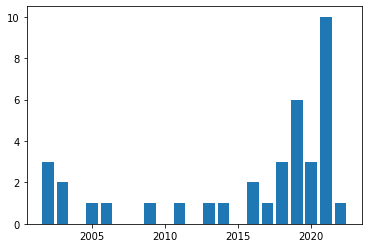

In [433]:
df['year'] = df['release_date'].apply(lambda x: x[:4])

hist = dict.fromkeys(range(int(df['year'].min()), int(df['year'].max()) + 1), 0)

def count_years(y):
    hist[int(y)] += 1

df['year'].apply(count_years)

fig, ax = plt.subplots()
ax.bar(hist.keys(), hist.values())

count     37.000000
mean     117.591865
std       27.973328
min       80.018000
25%       96.060000
50%      106.520000
75%      133.015000
max      179.995000
Name: tempo, dtype: float64


<AxesSubplot:>

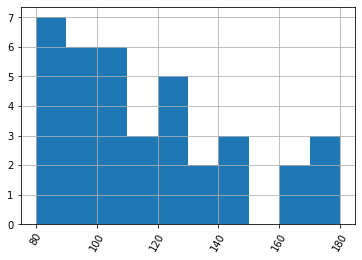

In [434]:
tempo = df['tempo'].sort_values()
print(tempo.describe())
tempo.hist(xrot=60)

<AxesSubplot:>

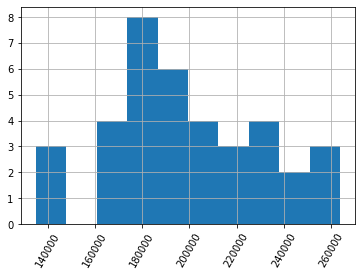

In [435]:
df['duration_ms'].sort_values().hist(xrot=60)